In [74]:
#jesus hurtado red convolucional pythorch
import torch
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

#graficas de costos
def get_hist(model,data_set):
    activations=model.activation(data_set.x)
    for i,activation in enumerate(activations):
        plt.hist(activation.numpy(),4,density=True)
        plt.title("Activation layer " + str(i+1))
        plt.xlabel("Activation")
        plt.xlabel("Activation")
        plt.legend()
        plt.show()
#lectura de datos para x y  yhat
import math
class Data(Dataset):
    def __init__(self,N,f):
      R_N_f = torch.zeros(N,f)
      self.x=torch.linspace(-20, 20, 10000).view(-1,1)
      
      R_N_1 = torch.zeros((N,f)) 
          
      for i, val in enumerate(self.x):
        for m, x1 in enumerate(val):
        #print (x, ",",val2)
          s = 16 * x1      
          s = math.sin(s)
          R_N_1[i] = - ( ( x1 - 2 ) **2  + 3 + 0.2 ) * s 

      self.y = R_N_1
      self.len=self.x.shape[0]

    def __getitem__(self,index):    
            
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len
#configuracion de la red
class Net(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Net,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.linear2=nn.Linear(H,D_out)

        
    def forward(self,x):
        x=torch.sigmoid(self.linear1(x))  
        x=torch.sigmoid(self.linear2(x))
        return x

#funcion para el aprendizaje        
def train(data_set,model,criterion, train_loader, optimizer, epochs=5,plot_number=10):
    cost=[]
    
    for epoch in range(epochs):
        total=0
        
        for x,y in train_loader:
            
            # batch_size = 100
            # x=(100, 1), y=(100,1)

            optimizer.zero_grad()
            
            yhat=model(x)
            loss=criterion(yhat,y)
            loss.backward()
            optimizer.step()
            total+=loss.item()
            
       
        
        cost.append(total)
    plt.figure()
    plt.plot(cost)
    plt.xlabel('epoch')
    plt.ylabel('cost')
    plt.show()
    return cost
    #implementar la instancia de los datos con la formula para y del  punto 2.2
data_set=Data(10000,1)


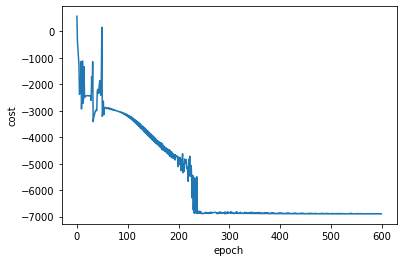

In [75]:
#ejecucion y aprendizaje de la red
torch.manual_seed(0)
model=Net(1,9,1)
learning_rate=0.1
criterion=nn.BCELoss()
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)


train_loader=DataLoader(dataset=data_set,batch_size=100)


COST=train(data_set,model,criterion, train_loader, optimizer, epochs=600,plot_number=200)